**AUS RAINFALL PREDICTION** 

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from sklearn.preprocessing import StandardScaler

Reading data from source

In [2]:
df=pd.read_csv("weatherAUS.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Understanding the Data



Descriptive Statistics

In [4]:
df.describe(include="all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

There are 145460 observations with 23 columns where the column named "RainTomorrow" is the target column and other columns are the explanatory/ independent columns.

There are many missing values which needs to be filled.



To fill missing values we will use imputer

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
numsi=SimpleImputer(missing_values=np.nan,strategy="mean") #creating an object of class
catsi=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

for numerical data we use mean of the column to impute in place of null values and for categorical data mode is to be imputed.

In [8]:
numcol,catcol=df.select_dtypes([float]).columns,df.select_dtypes([object]).columns
df[numcol]=numsi.fit_transform(df[numcol])
df[catcol]=catsi.fit_transform(df[catcol])


In [9]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Encoding Categorical Data

In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])

In [11]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396.0,2.0,13.4,22.900000,0.6,5.468232,7.611178,13.0,44.00000,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,397.0,2.0,7.4,25.100000,0.0,5.468232,7.611178,14.0,44.00000,6.0,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,398.0,2.0,12.9,25.700000,0.0,5.468232,7.611178,15.0,46.00000,13.0,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,399.0,2.0,9.2,28.000000,0.0,5.468232,7.611178,4.0,24.00000,9.0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,400.0,2.0,17.5,32.300000,1.0,5.468232,7.611178,13.0,41.00000,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,3431.0,41.0,2.8,23.400000,0.0,5.468232,7.611178,0.0,31.00000,9.0,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0.0,0.0
145456,3432.0,41.0,3.6,25.300000,0.0,5.468232,7.611178,6.0,22.00000,9.0,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0.0,0.0
145457,3433.0,41.0,5.4,26.900000,0.0,5.468232,7.611178,3.0,37.00000,9.0,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0.0,0.0
145458,3434.0,41.0,7.8,27.000000,0.0,5.468232,7.611178,9.0,28.00000,10.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0.0,0.0


In [12]:
df["RainTomorrow"]=df["RainTomorrow"].astype(int)   

In [13]:
df["RainTomorrow"].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

We can see that it is an IMBALANCED DATA ,so we need to perform SMOTE 

SPLITTING DATA INTO TARGET AND FEATURES 

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

Training and testing data

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)

In [16]:
from imblearn.combine import SMOTETomek

In [17]:
st=SMOTETomek(random_state=0)
xtrainn,ytrainn=st.fit_resample(xtrain,ytrain)

In [18]:
sc=StandardScaler()
xtrainn=sc.fit_transform(xtrainn)
xtest=sc.transform(xtest)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,min_delta=1,patience=13)

In [20]:
#Step 1: init the model
ann=Sequential()
#Step 2: add layers into the model
# Hidden Layer 1
ann.add(Dense(units=64,activation="relu"))
#Dropout Layer for Hidden Layer 1
ann.add(Dropout(rate=0.2))

#Hidden Layer 2:
ann.add(Dense(units=64,activation="relu"))
#dropout layer for Hidden Layer 2
ann.add(Dropout(rate=0.1))

#Output Layer
ann.add(Dense(units=1,activation="sigmoid"))     #since its binary classification

#Step 3:Establish connection between layers
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])



In [21]:
#step 4: Train the model
ann.fit(xtrainn,ytrainn,epochs=800,validation_data=(xtest,ytest),verbose=1,callbacks=[early_stop])

Epoch 1/800
5655/5655 [==============================] - 19s 3ms/step - loss: 0.4425 - accuracy: 0.7917 - val_loss: 0.4424 - val_accuracy: 0.7930
Epoch 2/800
5655/5655 [==============================] - 16s 3ms/step - loss: 0.4148 - accuracy: 0.8083 - val_loss: 0.4150 - val_accuracy: 0.8130
Epoch 3/800
5655/5655 [==============================] - 15s 3ms/step - loss: 0.4045 - accuracy: 0.8134 - val_loss: 0.4013 - val_accuracy: 0.8183
Epoch 4/800
5655/5655 [==============================] - 15s 3ms/step - loss: 0.3984 - accuracy: 0.8157 - val_loss: 0.4059 - val_accuracy: 0.8168
Epoch 5/800
5655/5655 [==============================] - 15s 3ms/step - loss: 0.3935 - accuracy: 0.8173 - val_loss: 0.4033 - val_accuracy: 0.8158
Epoch 6/800
5655/5655 [==============================] - 15s 3ms/step - loss: 0.3890 - accuracy: 0.8203 - val_loss: 0.4169 - val_accuracy: 0.8098
Epoch 7/800
5655/5655 [==============================] - 17s 3ms/step - loss: 0.3855 - accuracy: 0.8221 - val_loss: 0.4077 -

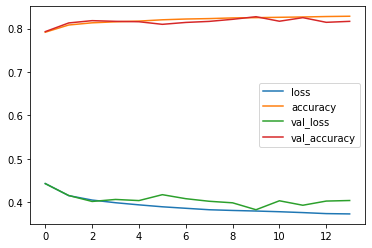

In [22]:
df2=pd.DataFrame(ann.history.history)
df2.plot()
plt.show()


In [23]:
# Step 5: Predicting using model
ypred=ann.predict(xtest)


910/910 [==============================] - 1s 1ms/step


In [24]:
ypred

array([[0.42791754],
       [0.12508179],
       [0.24476512],
       ...,
       [0.04935293],
       [0.00862174],
       [0.31016973]], dtype=float32)

These are nothing but probablistic value that lies within the logit function , so we need to convert them to binary class by specifing the condition(threshold value)

In [25]:
ypred=np.where(ypred>0.5,1,0)
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

EVALUATING THE MODEL

In [26]:
from sklearn.metrics import accuracy_score,classification_report

In [27]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     22714
           1       0.56      0.73      0.64      6378

    accuracy                           0.82     29092
   macro avg       0.74      0.79      0.76     29092
weighted avg       0.84      0.82      0.82     29092

